In [82]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [83]:
data=pd.read_csv('diabetes_prediction_dataset.csv')
shape=data.shape
print(shape)
data.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [84]:
data = data.drop_duplicates()
print(data.shape)

(96146, 9)


In [85]:
data["diabetes"].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

In [86]:
data.drop(["smoking_history","gender"],axis=1,inplace=True)

In [87]:
data.isnull().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [88]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming you have your DataFrame named 'df'

X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a DataFrame with the oversampled data
oversampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['diabetes'])], axis=1)
oversampled_df.shape

(175328, 7)

In [89]:
oversampled_df["diabetes"].value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

In [90]:
oversampled_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [91]:
X = oversampled_df.drop('diabetes', axis=1).values
y = oversampled_df['diabetes'].values

y = np.ravel(y)

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (126235, 6) (126235,)
Validation set shape: (14027, 6) (14027,)
Test set shape: (35066, 6) (35066,)


In [93]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [94]:
# Perform logistic regression with cross-validation
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

In [95]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
# Predict on the validation and test sets
y_val_pred = logreg.predict(X_val)
y_test_pred = logreg.predict(X_test)

In [97]:

# Evaluate performance on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

In [98]:
# Evaluate performance on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)


In [99]:
# Calculate ROC curve and AUC
y_scores = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [100]:
# Print evaluation metrics
print("Validation Accuracy:", accuracy_val)
print("Validation Confusion Matrix:\n", confusion_matrix_val)
print("Validation Classification Report:\n", classification_report_val)
print("Test Accuracy:", accuracy_test)
print("Test Confusion Matrix:\n", confusion_matrix_test)
print("Test Classification Report:\n", classification_report_test)
print("AUC:", roc_auc)
print("Mean CV Accuracy:", np.mean(cv_scores))

Validation Accuracy: 0.8813003493262993
Validation Confusion Matrix:
 [[6111  844]
 [ 821 6251]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6955
           1       0.88      0.88      0.88      7072

    accuracy                           0.88     14027
   macro avg       0.88      0.88      0.88     14027
weighted avg       0.88      0.88      0.88     14027

Test Accuracy: 0.8856442137683226
Test Confusion Matrix:
 [[15428  2011]
 [ 1999 15628]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     17439
           1       0.89      0.89      0.89     17627

    accuracy                           0.89     35066
   macro avg       0.89      0.89      0.89     35066
weighted avg       0.89      0.89      0.89     35066

AUC: 0.962652920974541
Mean CV Accuracy: 0.8841050421832298


In [101]:
from sklearn.metrics import roc_auc_score

# Assuming you have the predictions for each set: y_test_pred, y_val_pred, y_train_pred
# Calculate AUC for test set
auc_test = roc_auc_score(y_test, y_test_pred)

# Calculate AUC for validation set
auc_val = roc_auc_score(y_val, y_val_pred)

# Calculate AUC for cross-validation predictions

# Print AUC values
print("AUC - Test:", auc_test)
print("AUC - Validation:", auc_val)



AUC - Test: 0.8856390919017094
AUC - Validation: 0.8812784126950564


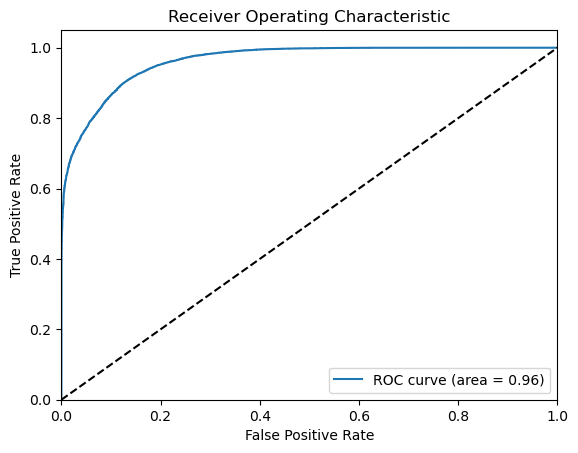

In [102]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')


In [105]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

In [107]:
# Evaluate performance on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

In [108]:
# Evaluate performance on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

In [109]:
# Print evaluation metrics

print("Validation Accuracy:", accuracy_val)
print("Validation Confusion Matrix:\n", confusion_matrix_val)
print("Validation Classification Report:\n", classification_report_val)
print("Test Accuracy:", accuracy_test)
print("Test Confusion Matrix:\n", confusion_matrix_test)
print("Test Classification Report:\n", classification_report_test)

print("Validation AUC:", auc_val)
print("Mean CV AUC:", np.mean(cv_scores))
print("Test AUC:", auc_test)

Validation Accuracy: 0.9317031439366935
Validation Confusion Matrix:
 [[6269  686]
 [ 272 6800]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6955
           1       0.91      0.96      0.93      7072

    accuracy                           0.93     14027
   macro avg       0.93      0.93      0.93     14027
weighted avg       0.93      0.93      0.93     14027

Test Accuracy: 0.9331546227114584
Test Confusion Matrix:
 [[15699  1740]
 [  604 17023]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     17439
           1       0.91      0.97      0.94     17627

    accuracy                           0.93     35066
   macro avg       0.94      0.93      0.93     35066
weighted avg       0.93      0.93      0.93     35066

Validation AUC: 0.931452192667146
Mean CV AUC: 0.9737485411368564
Test AUC: 0.9329790107135408


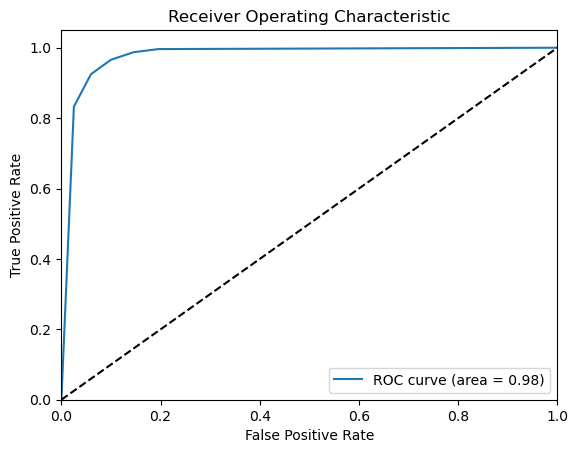

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Cross-Validation AUC Scores: [0.92338248 0.930043   0.9258676  0.92584877 0.92989305]
Validation Accuracy: 0.8408070150424182
Validation Confusion Matrix:
 [[6069  886]
 [1347 5725]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6955
           1       0.87      0.81      0.84      7072

    accuracy                           0.84     14027
   macro avg       0.84      0.84      0.84     14027
weighted avg       0.84      0.84      0.84     14027

Test Accuracy: 0.8411281583300063
Test Confusion Matrix:
 [[15262  2177]
 [ 3394 14233]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     17439
           1       0.87      0.81      0.84     17627

    accuracy                           0.84     35066
   macro avg       0.84      0.84      0.84     35066
weighted avg       0.84      0.84      0.84     35066

Test AUC: 

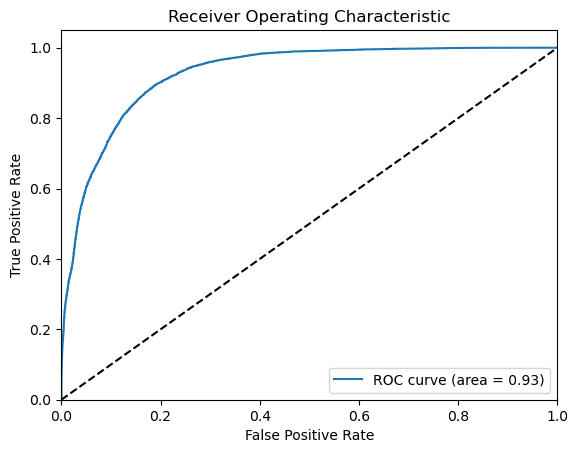

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your features in X and target variable in y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# Perform Naive Bayes classification with cross-validation
nb = GaussianNB()
cv_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc')

# Fit the model on the training set
nb.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = nb.predict(X_val)
y_test_pred = nb.predict(X_test)

# Evaluate performance on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)
auc_val = roc_auc_score(y_val, y_val_pred)

# Evaluate performance on test set
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation metrics
print("Cross-Validation AUC Scores:", cv_scores)

print("Validation Accuracy:", accuracy_val)
print("Validation Confusion Matrix:\n", confusion_matrix_val)
print("Validation Classification Report:\n", classification_report_val)

print("Test Accuracy:", accuracy_test)
print("Test Confusion Matrix:\n", confusion_matrix_test)
print("Test Classification Report:\n", classification_report_test)
print("Test AUC:", auc_test)
print("Mean CV AUC:", np.mean(cv_scores))
print("Validation AUC:", auc_val)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Cross-Validation AUC Scores: [0.89506547 0.89835508 0.89424672 0.89656284 0.89721557]
Validation Accuracy: 0.8069437513367078
Validation Confusion Matrix:
 [[5610 1345]
 [1363 5709]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      6955
           1       0.81      0.81      0.81      7072

    accuracy                           0.81     14027
   macro avg       0.81      0.81      0.81     14027
weighted avg       0.81      0.81      0.81     14027

Test Accuracy: 0.8057662693207095
Test Confusion Matrix:
 [[14217  3222]
 [ 3589 14038]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     17439
           1       0.81      0.80      0.80     17627

    accuracy                           0.81     35066
   macro avg       0.81      0.81      0.81     35066
weighted avg       0.81      0.81      0.81     35066

Test AUC: 

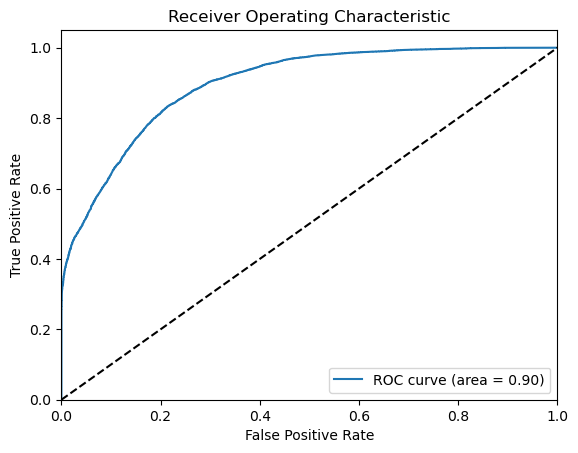

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have your features in X and target variable in y

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# Perform Elastic Net classification with cross-validation
alpha = 0.5  # Regularization parameter
l1_ratio = 0.5  # Mixing parameter between L1 and L2 penalty
enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
cv_scores = cross_val_score(enet, X_train, y_train, cv=5, scoring='roc_auc')

# Fit the model on the training set
enet.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = enet.predict(X_val)
y_test_pred = enet.predict(X_test)

# Convert predicted probabilities to binary predictions
y_val_pred_binary = np.where(y_val_pred >= 0.5, 1, 0)
y_test_pred_binary = np.where(y_test_pred >= 0.5, 1, 0)

# Evaluate performance on validation set
accuracy_val = accuracy_score(y_val, y_val_pred_binary)
confusion_matrix_val = confusion_matrix(y_val, y_val_pred_binary)
classification_report_val = classification_report(y_val, y_val_pred_binary)
auc_val = roc_auc_score(y_val, y_val_pred)

# Evaluate performance on test set
accuracy_test = accuracy_score(y_test, y_test_pred_binary)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred_binary)
classification_report_test = classification_report(y_test, y_test_pred_binary)
auc_test = roc_auc_score(y_test, y_test_pred)

# Print evaluation metrics
print("Cross-Validation AUC Scores:", cv_scores)

print("Validation Accuracy:", accuracy_val)
print("Validation Confusion Matrix:\n", confusion_matrix_val)
print("Validation Classification Report:\n", classification_report_val)

print("Test Accuracy:", accuracy_test)
print("Test Confusion Matrix:\n", confusion_matrix_test)
print("Test Classification Report:\n", classification_report_test)
print("Test AUC:", auc_test)
print("Mean CV AUC:", np.mean(cv_scores))
print("Validation AUC:", auc_val)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [123]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet

# Load and preprocess the new data
new_data = pd.DataFrame({
    'age': [65.0],
    'hypertension': [1],
    'heart_disease': [1],
    'bmi': [30.5],
    'HbA1c_level': [6.2],
    'blood_glucose_level': [120]
})

# Use the trained Elastic Net model to make a prediction
y_new_pred = enet.predict(new_data)


# Convert the predicted values to 0 or 1
y_new_pred_binary = np.round(y_new_pred).astype(int)

# Print the predicted diabetes value
print("Predicted Diabetes:", y_new_pred_binary[0])


Predicted Diabetes: 0


C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
